<a href="https://colab.research.google.com/github/RohanKulkarni100/StockPricePrediction/blob/main/Trending_Chart_Pattern_Analysis(Minded_Hack)_Sample_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ChartPatterns/SampleData3.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'open', 'close', 'low', 'high', 'date'], dtype='object')

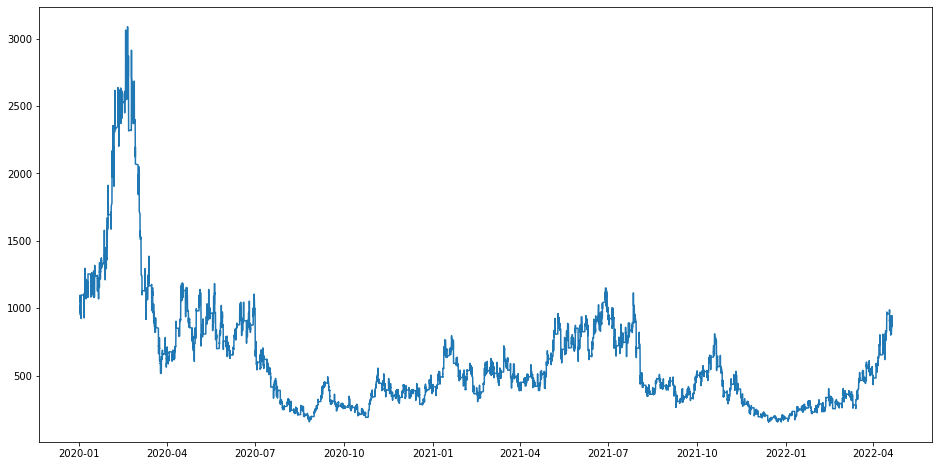

In [5]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [6]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [7]:
# Splitting the date part from DataFrame
df['Date'] = [d.date() for d in df['date']]

# Splitting the time part from DataFrame
df['Time'] = [d.time() for d in df['date']]

In [8]:
df.head()

,Unnamed: 0,open,close,low,high,date,Date,Time
date,,,,,,,,
2020-01-02 09:00:00,0,1042.100000,1043.571700,1040.968714,1044.702986,2020-01-02 09:00:00,2020-01-02,09:00:00
2020-01-02 09:05:00,1,1043.571700,1049.987832,1042.870259,1050.689273,2020-01-02 09:05:00,2020-01-02,09:05:00
2020-01-02 09:10:00,2,1049.987832,1052.601055,1046.933337,1055.655550,2020-01-02 09:10:00,2020-01-02,09:10:00
2020-01-02 09:15:00,3,1052.601055,1056.750000,1049.021508,1060.329547,2020-01-02 09:15:00,2020-01-02,09:15:00
2020-01-02 09:20:00,4,1056.750000,1059.955315,1055.045423,1061.659892,2020-01-02 09:20:00,2020-01-02,09:20:00


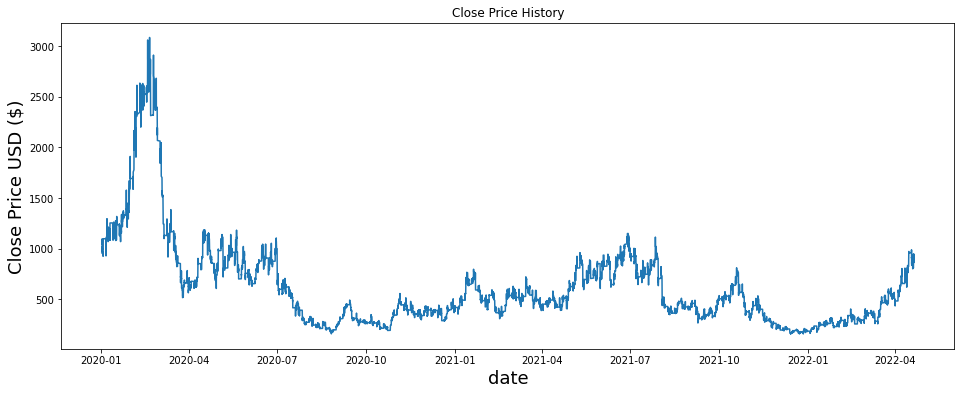

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

41024

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.30282758],
       [0.30501564],
       [0.30590682],
       ...,
       [0.26864203],
       [0.26887259],
       [0.26900324]])

In [12]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.30282758, 0.30501564, 0.30590682, 0.30732171, 0.3084148 ,
       0.31108825, 0.31243314, 0.31586421, 0.31575866, 0.31649533,
       0.31696409, 0.31750949, 0.31708062, 0.31844425, 0.31798101,
       0.31957999, 0.319602  , 0.3205451 , 0.31874122, 0.31435425,
       0.31567636, 0.31096967, 0.31006625, 0.30788273, 0.30707958,
       0.30121001, 0.30407763, 0.30056651, 0.29642736, 0.29554726,
       0.29056717, 0.29151745, 0.29123304, 0.29203968, 0.29235819,
       0.29312827, 0.29393201, 0.29479278, 0.29517643, 0.29582918,
       0.29532674, 0.29529721, 0.2937237 , 0.29368311, 0.29332979,
       0.29236885, 0.29149135, 0.28995351, 0.28844801, 0.28644078,
       0.28483739, 0.28362723, 0.28099515, 0.27873857, 0.27646922,
       0.27722189, 0.27925626, 0.28046786, 0.28214046, 0.28059899])]
[0.2813353634759149]

[array([0.30282758, 0.30501564, 0.30590682, 0.30732171, 0.3084148 ,
       0.31108825, 0.31243314, 0.31586421, 0.31575866, 0.31649533,
       0.31696409, 0.31750949, 0.317

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

40964/40964 [==============================] - 1819s 44ms/step - loss: 2.7837e-04


In [14]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

68/68 [==============================] - 8s 99ms/step


10.09331130108046